# Guía 3

## Importación de modulos y definición de funciones

In [1]:
import os
import numpy as np
import scipy.io as spio
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

def get_indexes(stim_labels, stim_code):
    indexes = []
    for i in range(len(stim_labels)):
        if stim_labels[i] == stim_code:
            indexes.append(i)
    return indexes

def mean_channel(data, indexes):
    channels = {}
    for channel in range(len(data[0])):
        canal = []
        for sample in range(len(data[0][channel])):
            samples = []
            for i in indexes:
                samples.append(data[i][channel][sample])
            canal.append(np.mean(samples))
        channels[channel] = canal
    return channels

def butter_bandpass_filter(data, frecuencias, sampling_freq, order, axis):
    frecuencias = [frecuencias[i]/(sampling_freq/2) for i in range(len(frecuencias))]
    b, a = signal.butter(order, frecuencias, btype='band')
    y = signal.filtfilt(b, a, data, axis = axis, padlen = None)
    return y

def butter_bandpass_live(data, frecuencias, sampling_freq, order, axis):
    frecuencias = [frecuencias[i]/(sampling_freq/2) for i in range(len(frecuencias))]
    b, a = signal.butter(order, frecuencias, btype='band')
    y = signal.lfilter(b, a, data, axis = axis)
    return y

def metricas(confusion_matrix):

    taza_aciertos = (confusion_matrix[0,0] + confusion_matrix[1,1])/np.sum(confusion_matrix)
    presicion = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
    sensibilidad = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])
    especificidad = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[1,0])

    return taza_aciertos, presicion, sensibilidad, especificidad

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

## 3.1

### 1

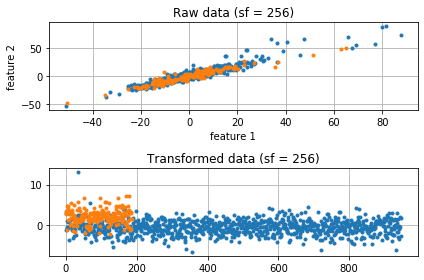

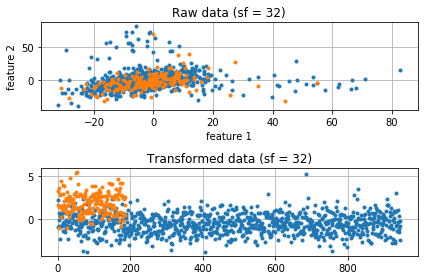

In [13]:
data_256 = spio.loadmat('Datos/Datos_Sujeto1_256.mat')
datos_256 = np.swapaxes(data_256['Datos'], 1, 2)
data_32 = spio.loadmat('Datos/Datos_Sujeto1_32.mat')
datos_32 = np.swapaxes(data_32['Datos'], 1, 2)
labels = data_256['Etiquetas']

datos_256 = np.reshape(datos_256, [3780, 2560])
datos_32 = np.reshape(datos_32, [3780, 320])

###---- 256 ----###
###---- SEPARACION DE DATOS EN TRAIN Y VAL ----###
datos_256_train, datos_256_val, labels_train, labels_val = train_test_split(datos_256, labels, test_size=0.3, random_state=42)
labels_train = np.ravel(labels_train)
labels_val = np.ravel(labels_val)

indexes_0 = get_indexes(labels_val, 0)
indexes_1 = get_indexes(labels_val, 1)

###---- LDA ----###
lda_256 = LinearDiscriminantAnalysis()
lda_256.fit(datos_256_train, labels_train)

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.set_title('Raw data (sf = 256)')
ax1.grid()
ax1.set_xlabel('feature 1')
ax1.set_ylabel('feature 2')
ax1.plot(datos_256_val[indexes_0, 5], datos_256_val[indexes_0, 10], '.')
ax1.plot(datos_256_val[indexes_1, 5], datos_256_val[indexes_1, 10], '.')

ax2= fig.add_subplot(2,1,2)
ax2.grid()
ax2.set_title('Transformed data (sf = 256)')
ax2.plot(lda_256.transform(datos_256_val)[indexes_0], '.')
ax2.plot(lda_256.transform(datos_256_val)[indexes_1], '.')
fig.tight_layout()

###---- 32 ----###
###---- SEPARACION DE DATOS EN TRAIN Y VAL ----#
datos_32_train, datos_32_val, labels_train, labels_val = train_test_split(datos_32, labels, test_size=0.3, random_state=42)
labels_train = np.ravel(labels_train)
labels_val = np.ravel(labels_val)

indexes_0 = get_indexes(labels_val, 0)
indexes_1 = get_indexes(labels_val, 1)

###---- LDA ----###
lda_32 = LinearDiscriminantAnalysis(solver = 'eigen')
lda_32.fit(datos_32_train, labels_train)

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.set_title('Raw data (sf = 32)')
ax1.grid()
ax1.set_xlabel('feature 1')
ax1.set_ylabel('feature 2')
ax1.plot(datos_32_train[indexes_0, 5], datos_32_train[indexes_0, 10], '.')
ax1.plot(datos_32_train[indexes_1, 5], datos_32_train[indexes_1, 10], '.')

ax2= fig.add_subplot(2,1,2)
ax2.grid()
ax2.set_title('Transformed data (sf = 32)')
ax2.plot(lda_32.transform(datos_32_val)[indexes_0], '.')
ax2.plot(lda_32.transform(datos_32_val)[indexes_1], '.')
fig.tight_layout()

### 2

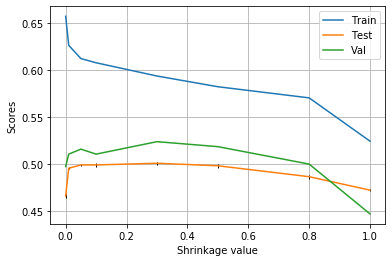

In [46]:
data_32 = spio.loadmat('Datos/Datos_Sujeto1_32.mat')
datos_32 = np.swapaxes(data_32['Datos'], 1, 2)
sf = 32
tiempo = np.array([i/sf for i in range(len(datos_32[0][0]))])
indice_250 = np.where(tiempo >= 0.25)[0][0]
indice_650 = np.where(tiempo >= 0.65)[0][0]
datos_32 = datos_32[:, :, indice_250:indice_650]

labels = data_32['Etiquetas']
datos_32 = np.reshape(datos_32, [3780, len(datos_32[0])*len(datos_32[0][0])])

datos_32_train, datos_32_val, labels_train, labels_val = train_test_split(datos_32, labels, test_size=0.1, random_state=42)
labels_train = np.ravel(labels_train)
labels_val = np.ravel(labels_val)

indices_0 = get_indexes(labels_train, 0)
indices_1 = get_indexes(labels_train,1)
indices_0_cant_bal = random.sample(indices_0, len(indices_1))
indices_bal = indices_0_cant_bal + indices_1
datos_32_bal = datos_32[indices_bal]
labels_bal = labels_train[indices_bal]

shrink_list = [0, 0.01, 0.05, 0.1, 0.3, 0.5, 0.8, 1]
means_test = []
means_train = []
variances_test = []
variances_train = []
means_val = []

for s in shrink_list:
    lda = LinearDiscriminantAnalysis(solver = 'eigen', shrinkage = s)
    scores = cross_validate(lda, datos_32_bal, labels_bal, cv=5, return_train_score=True)
    means_test.append(np.mean(scores['test_score']))
    means_train.append(np.mean(scores['train_score']))
    variances_test.append(np.var(scores['test_score']))
    variances_train.append(np.var(scores['train_score']))
    lda.fit(datos_32_bal, labels_bal)
    means_val.append(lda.score(datos_32_val, labels_val))

plt.figure()
plt.grid()
plt.xlabel('Shrinkage value')
plt.ylabel('Scores')
plt.plot(shrink_list, means_train, label='Train')
plt.errorbar(shrink_list, means_train, yerr = variances_train, fmt = 'none', ecolor = 'k', elinewidth = 1)
plt.plot(shrink_list, means_test, label='Test')
plt.errorbar(shrink_list, means_test, yerr = variances_test, fmt = 'none', ecolor = 'k', elinewidth = 1)
plt.plot(shrink_list, means_val, label='Val')
plt.legend()

### 3

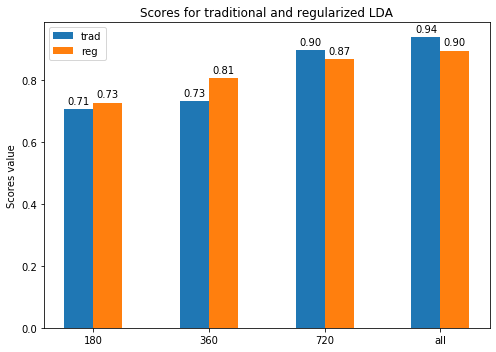

In [47]:
data_32 = spio.loadmat('Datos/Datos_Sujeto1_32.mat')
datos_32 = np.swapaxes(data_32['Datos'], 1, 2)
labels = data_32['Etiquetas']
datos_32 = np.reshape(datos_32, [3780, 320])

indices_0 = get_indexes(labels, 0)
indices_1 = get_indexes(labels,1)
indices_0_630 = random.sample(indices_0, len(indices_1))
indices_bal = indices_0_630 + indices_1
datos_32_bal = datos_32[indices_bal]
labels_bal = labels[indices_bal]

tamaños = [180, 360, 720, len(datos_32_bal)]
desempeños_trad = {}
desempeños_reg = {}
for tamaño in tamaños:
    resultados_trad = []
    resultados_reg = []
    for i in range(10):
        indices = random.sample(list(np.arange(len(datos_32_bal))), tamaño)
        datos_train = datos_32_bal[indices]
        labels_train = np.ravel(labels_bal[indices])
        datos_val = np.delete(datos_32_bal, indices, axis = 0)
        labels_val = np.delete(labels_bal, indices, axis = 0)

        lda_trad = LinearDiscriminantAnalysis()
        lda_reg = LinearDiscriminantAnalysis(solver = 'eigen', shrinkage = 'auto')
        lda_trad.fit(datos_train, labels_train)
        lda_reg.fit(datos_train, labels_train)
        resultados_trad.append(lda_trad.score(datos_32_bal, labels_bal))
        resultados_reg.append(lda_reg.score(datos_32_bal, labels_bal))

    desempeños_trad[tamaño]=np.mean(resultados_trad)
    desempeños_reg[tamaño]=np.mean(resultados_reg)
    
###---- PLOT SCORES ----###
graf_labels = ['180', '360', '720', 'all']
x = np.arange(len(graf_labels))  # the label locations
width = 0.25 # the width of the bars

fig, ax = plt.subplots(figsize = (7,5))
rects1 = ax.bar(x - width/2, desempeños_trad.values(), width, label='trad')
rects2 = ax.bar(x + width/2, desempeños_reg.values(), width, label='reg')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores value')
ax.set_title('Scores for traditional and regularized LDA')
ax.set_xticks(x)
ax.set_xticklabels(graf_labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()


### 3.2

288 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
Computing data rank from raw with rank=None
    Using tolerance 26 (2.2e-16 eps * 22 dim * 5.4e+15  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using SHRINKAGE
Done.
Computing data rank from raw with rank=None
    Using tolerance 26 (2.2e-16 eps * 22 dim * 5.4e+15  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using SHRINKAGE
Done.


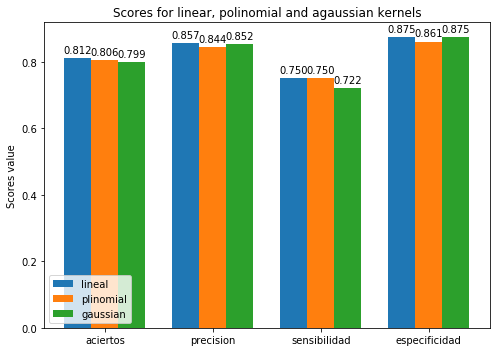

In [8]:
import mne
from mne.decoding import CSP
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
import random

data = spio.loadmat('Datos/DataEEG_MI.mat')
datos = np.swapaxes(data['Data'], 0, 2)
labels = np.ravel(data['labels'][0])
sf = data['sf'][0][0]
tiempo = [i/sf for i in range(len(datos[0][0]))]
datos_filt = butter_bandpass_live(datos, [8,30], sf, 5, axis = 2)

channel_names = [data['Channels'][i][0][0]for i in range(len(data['Channels']))]
tipos = ['eeg' for i in range(len(channel_names))]
info = mne.create_info(ch_names = channel_names, sfreq = sf, ch_types = tipos)
eeg = mne.EpochsArray(datos_filt, info)
eeg.set_montage('standard_1020')
eeg_temp = eeg.get_data()

#datos_train, datos_val, labels_train, labels_val = train_test_split(eeg_temp, labels, test_size=0.3, random_state=42)

csp = CSP(n_components=22, reg=0.5, log=True, transform_into='average_power')
eeg_CSP = csp.fit_transform(eeg_temp, labels)
#eeg_CSP_val = csp.fit_transform(datos_val, labels_val)

features = [np.concatenate((eeg_CSP[i,:3], eeg_CSP[i,-3:])) for i in range(len(eeg_CSP))]
#features_val = [np.concatenate((eeg_CSP_val[i,:3], eeg_CSP_val[i,-3:])) for i in range(len(eeg_CSP_val))]

eeg_features = np.array(features)
#eeg_features_val = np.array(features_val)

cv = KFold(n_splits = 10, shuffle = True, random_state = 654781)

linear = SVC(kernel = 'linear')
linear_predictions = cross_val_predict(linear, eeg_features, labels, cv=cv)
#linear.fit(eeg_features_train, labels_train)
#linear_predictions = linear.predict(features_val)
CM_lineal = confusion_matrix(labels, linear_predictions)
linear_results = metricas(CM_lineal)


polinomial = SVC(kernel = 'poly')
predictions_poly = cross_val_predict(polinomial, eeg_features, labels, cv=cv)
#polinomial.fit(eeg_features_train, labels_train)
#predictions_poly = polinomial.predict(features_val)
CM_poly = confusion_matrix(labels, predictions_poly)
poly_results = metricas(CM_poly)


gaussian = SVC(kernel = 'rbf')
predictions_gaus = cross_val_predict(gaussian, eeg_features, labels, cv=cv)
#gaussian.fit(eeg_features_train, labels_train)
#predictions_gaus = gaussian.predict(features_val)
CM_gaus = confusion_matrix(labels, predictions_gaus)
gauss_results = metricas(CM_gaus)

###---- PLOT SCORES ----###
graf_labels = ['aciertos', 'precision', 'sensibilidad', 'especificidad']
x = np.arange(len(graf_labels))  # the label locations
width = 0.25 # the width of the bars

fig, ax = plt.subplots(figsize = (7,5))
rects1 = ax.bar(x - width, linear_results, width, label='lineal')
rects2 = ax.bar(x, poly_results, width, label='plinomial')
rects3 = ax.bar(x + width, gauss_results, width, label='gaussian')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores value')
ax.set_title('Scores for linear, polinomial and agaussian kernels')
ax.set_xticks(x)
ax.set_xticklabels(graf_labels)
ax.legend(loc='lower left')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
fig.tight_layout()
plt.show()

### 3.3

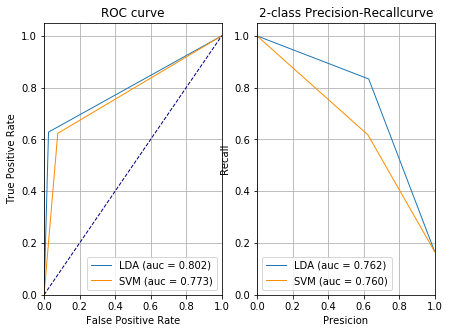

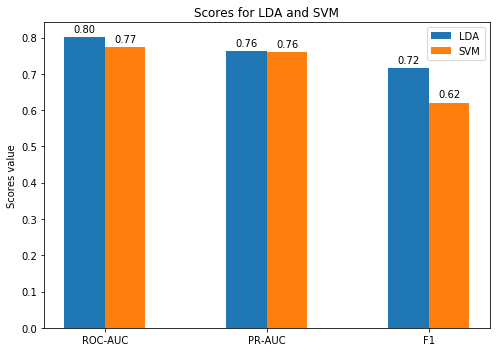

In [37]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve, roc_curve, auc
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

data_32 = spio.loadmat('Datos/Datos_Sujeto1_32.mat')
datos_32 = np.swapaxes(data_32['Datos'], 1, 2)
labels = np.ravel(data_32['Etiquetas'])
datos_32 = np.reshape(datos_32, [3780, 320])

cv = KFold(n_splits = 10, shuffle = True, random_state = 654781)

###---- LDA ----###
lda = LinearDiscriminantAnalysis(solver = 'eigen', shrinkage = 'auto')
predictions_lda = cross_val_predict(lda, datos_32, labels, cv=cv)

###---- SMV ----###
SVM_linear = LinearSVC()
predictions_SVM = cross_val_predict(SVM_linear, datos_32, labels, cv=cv)

###---- Calculo ROC y AUC-ROC ----###
fpr_lda, tpr_lda, tresholds = roc_curve(labels, predictions_lda)
fpr_SVM, tpr_SVM, tresholds = roc_curve(labels, predictions_SVM)

roc_auc_SVM = auc(fpr_SVM, tpr_SVM)
roc_auc_lda = auc(fpr_lda, tpr_lda)

###---- Caluclo PR y PR-AUC ----###
pr_lda, re_lda, thresholds = precision_recall_curve(labels, predictions_lda)
pr_SVM, re_SVM, thresholds = precision_recall_curve(labels, predictions_SVM)

PR_auc_lda = auc(re_lda, pr_lda)
PR_auc_SVM = auc(re_SVM, pr_lda)

###---- Caluclo F1 score ----###
lda_f1 = f1_score(labels, predictions_lda)
SVM_f1 = f1_score(labels, predictions_SVM)

fig = plt.figure(figsize = (7,5))

ax1 = plt.subplot(121)
ax1.plot(fpr_lda, tpr_lda, lw=1, label='LDA (auc = %0.3f)' % roc_auc_lda)
ax1.plot(fpr_SVM, tpr_SVM, color='darkorange', lw=1, label='SVM (auc = %0.3f)' % roc_auc_SVM)
ax1.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC curve')
ax1.grid()
ax1.legend(loc="lower right")

ax2 = plt.subplot(122)
ax2.plot(re_lda, pr_lda, lw=1, label='LDA (auc = %0.3f)' % PR_auc_lda)
ax2.plot(re_SVM, pr_SVM, color='darkorange', lw=1, label='SVM (auc = %0.3f)' % PR_auc_SVM)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Presicion')
ax2.set_ylabel('Recall')
ax2.set_title('2-class Precision-Recallcurve')
ax2.legend(loc="lower left")
ax2.grid()

###---- PLOT RESULTS ----###
graf_labels = ['ROC-AUC', 'PR-AUC', 'F1']
x = np.arange(len(graf_labels))  # the label locations
width = 0.25 # the width of the bars

fig, ax = plt.subplots(figsize = (7,5))
rects1 = ax.bar(x - width/2, [roc_auc_lda, PR_auc_lda, lda_f1], width, label='LDA')
rects2 = ax.bar(x + width/2, [roc_auc_SVM, PR_auc_SVM, SVM_f1], width, label='SVM')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores value')
ax.set_title('Scores for LDA and SVM')
ax.set_xticks(x)
ax.set_xticklabels(graf_labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()